In [1]:
import pandas as pd
import os

In [2]:
df=pd.read_csv('bank.csv')

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,no


In [4]:
df.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,239,3,999,1,failure,no


In [5]:
df.shape

(41188, 16)

In [6]:
print('No of rows:', df.shape[0])
print('No of columns:', df.shape[1])

No of rows: 41188
No of columns: 16


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          41188 non-null  int64 
 1   job          41188 non-null  object
 2   marital      41188 non-null  object
 3   education    41188 non-null  object
 4   default      41188 non-null  object
 5   housing      41188 non-null  object
 6   loan         41188 non-null  object
 7   contact      41188 non-null  object
 8   month        41188 non-null  object
 9   day_of_week  41188 non-null  object
 10  duration     41188 non-null  int64 
 11  campaign     41188 non-null  int64 
 12  pdays        41188 non-null  int64 
 13  previous     41188 non-null  int64 
 14  poutcome     41188 non-null  object
 15  y            41188 non-null  object
dtypes: int64(5), object(11)
memory usage: 5.0+ MB


In [9]:
df.isnull().sum()

age            0
job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
y              0
dtype: int64

In [10]:
df.describe(include='all')

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
count,41188.00000,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188.000000,41188.000000,41188.000000,41188.000000,41188,41188
unique,NaN,12,4,8,3,3,3,2,10,5,NaN,NaN,NaN,NaN,3,2
top,NaN,admin.,married,university.degree,no,yes,no,cellular,may,thu,NaN,NaN,NaN,NaN,nonexistent,no
freq,NaN,10422,24928,12168,32588,21576,33950,26144,13769,8623,NaN,NaN,NaN,NaN,35563,36548
mean,40.02406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,258.285010,2.567593,962.475454,0.172963,NaN,NaN
std,10.42125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,259.279249,2.770014,186.910907,0.494901,NaN,NaN
min,17.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,0.000000,0.000000,NaN,NaN
25%,32.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.000000,1.000000,999.000000,0.000000,NaN,NaN
50%,38.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,180.000000,2.000000,999.000000,0.000000,NaN,NaN
75%,47.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,319.000000,3.000000,999.000000,0.000000,NaN,NaN


In [11]:
#Dropping irrevalant features

df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [12]:
df=df.drop(['marital', 'education'], axis=1)

In [13]:
df.head()

,age,job,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,56,housemaid,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,no
1,57,services,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,no
2,37,services,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,no
3,40,admin.,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,no
4,56,services,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,no


In [14]:
#Encoding categories data
df['contact'].unique()

array(['telephone', 'cellular'], dtype=object)

In [15]:
#Encoding category data, create dummyp variable

df=pd.get_dummies(df, drop_first=True)
df.head()

,age,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,y_yes
0,56,261,1,999,0,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
1,57,149,1,999,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
2,37,226,1,999,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,40,151,1,999,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,56,307,1,999,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


In [16]:
#Not handling imbalance

df['y_yes'].value_counts()


0    36548
1     4640
Name: y_yes, dtype: int64

In [17]:
df = df.rename(columns = {'y_yes' : 'y'})

<AxesSubplot:xlabel='y', ylabel='count'>

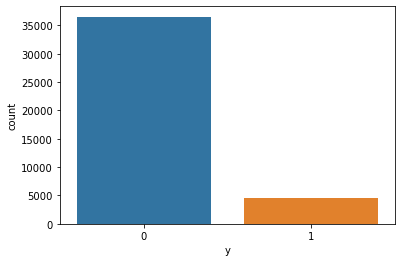

In [18]:
import seaborn as sns
sns.countplot(x='y', data=df)

In [19]:
'''
It is very important to handle imbalance data, imbalance data is that where our target variables shows left skew, which means
one class has very high and one is very low,show we have to handle this dataset
'''

#Lets understand what will happen if we not handle this dataset, first step seperate x var and y var

X=df.drop(['y'], axis=1)
y=df['y']

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

'''
Might be we will not get no result for minority class, so we use this STARTIFY, what it will do?
It will ensures that the split wull preserve the proportion of each class in the target variable y

1. Maintaining Class proportion : If your dataset is imbalanced, a simple random split might result in one set having more 
exampled of a particular class, leading biased model evaluation.

Startification ensures that both the training and testing sets have a similar distribution of the target variable

2. Improved Model Evaluation: By ensuring that the target variable's distribution is consistent across the train and test set


'''

"\nMight be we will not get no result for minority class, so we use this STARTIFY, what it will do?\nIt will ensures that the split wull preserve the proportion of each class in the target variable y\n\n1. Maintaining Class proportion : If your dataset is imbalanced, a simple random split might result in one set having more \nexampled of a particular class, leading biased model evaluation.\n\nStartification ensures that both the training and testing sets have a similar distribution of the target variable\n\n2. Improved Model Evaluation: By ensuring that the target variable's distribution is consistent across the train and test set\n\n\n"

In [21]:
#Feature Scaling

from sklearn.preprocessing import StandardScaler
st = StandardScaler()
X_train = st.fit_transform(X_train)
X_test = st.transform(X_test)

In [22]:
X_train

array([[ 0.86373877, -0.12019627,  0.52298128, ...,  2.01433847,
         0.39944711, -0.18627755],
       [-0.28972159, -0.2167318 , -0.20368791, ...,  2.01433847,
        -2.50346033, -0.18627755],
       [ 3.65126795,  3.43617293, -0.56702251, ..., -0.4964409 ,
         0.39944711, -0.18627755],
       ...,
       [ 1.34434725, -0.49089273,  0.52298128, ..., -0.4964409 ,
         0.39944711, -0.18627755],
       [-1.05869515, -0.3596044 , -0.56702251, ..., -0.4964409 ,
         0.39944711, -0.18627755],
       [-0.48196498,  1.10387435,  0.15964669, ..., -0.4964409 ,
         0.39944711, -0.18627755]])

In [23]:
#Algo Logistic Regression

from sklearn.linear_model import LogisticRegression
log = LogisticRegression()

log.fit(X_train, y_train)

LogisticRegression()

In [24]:
y_pred1 = log.predict(X_test)

In [25]:
from sklearn.metrics import accuracy_score

In [26]:
accuracy_score(y_test, y_pred1)

0.9128429230395727

In [27]:
'''
So remember that our dataset is imbalanced, depend on accuracy_score is not right, it is very very dangerous to use accuracy
as metrics on imbalanced data set

So, for imbalance dataset we have to check precision, recall and F1 score

'''

from sklearn.metrics import precision_score, recall_score, f1_score

In [28]:
'''
precision: It represents the model's ability to correctly predict the positives out of all the positives predictioms it made

prediction score is useful measure of the success of prediction if classes are very imbalanced

Mathematically, it represent the ratio of TP/(TP+FP)
'''

precision_score(y_test, y_pred1)


0.71

In [29]:
'''
Recall : It represents the model's ability to correctly predict the positives out of actual positive

Recall = TP/(TP+FN)
'''

recall_score(y_test, y_pred1)

0.38254310344827586

In [30]:
'''
f1 score : a function of precision and recall, harmonic mean of recall and precission

f1 score = 2*[(precision * recall)/ precision + recall]
'''

f1_score(y_test, y_pred1)

0.49719887955182074

In [31]:
#HANDLE IMBALANCED DATA WITH SMOTE

'''
this we can handle with two technique, oversampling or undersampling

OVERSAMPLING : The minority class using replacement

UNDERSAMPLING : Randomly delete rows from majority class to match with minority class
But disadvantage of undersampling is we can loss lot of valuable data

That's why we are going to use Oversampling with SMOTE

SMOTE : stands for SYNTHETIC MINORITY OVER SAMPLING TECHNIQUE
Ends to balanced by randomly increase the minority class examples by replacing them

How?
SMOTE generate the virtual training records by linear interpolation for the minority class, this synthetic 1 or more of the
K Nearest Neighbour for each samples of minority class

Advantage: You are not generating duplicates but rather creating synthetic data points that slightly different to originally
data points

In short we are balancing the data b/w major and minority class
'''


!pip install imblearn


from imblearn.over_sampling import SMOTE

In [32]:
X_res, y_res = SMOTE().fit_resample(X, y)  #Create new x and y i.e x_res and y_res

In [33]:
y_res.value_counts()

0    36548
1    36548
Name: y, dtype: int64

In [34]:
#Now split the data into training and test data set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.20, random_state=42)


#Since data is balance we have to remove stratify from here, if use it will give value error

In [35]:
#Algo Logistic Regression

from sklearn.linear_model import LogisticRegression
log = LogisticRegression()

log.fit(X_train, y_train)

C:\Users\mohit\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [36]:
y_pred2 = log.predict(X_test)

In [37]:
accuracy_score(y_test, y_pred2)

0.920656634746922

In [38]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision_score(y_test, y_pred2)

0.9265033407572383

In [39]:
recall_score(y_test, y_pred2)

0.9132821075740944

In [40]:
f1_score(y_test, y_pred2)

0.919845218352681

In [41]:
# SVM
from sklearn import svm
svm = svm.SVC()

In [42]:
svm.fit(X_train, y_train)

SVC()

In [43]:
y_pred3 = svm.predict(X_test)

In [44]:
accuracy_score(y_test, y_pred3)

0.7829001367989056

In [45]:
precision_score(y_test, y_pred3)

0.8318812520167796

In [46]:
recall_score(y_test, y_pred3)

0.7074643249176729

In [47]:
f1_score(y_test, y_pred3)

0.7646448168471007

In [48]:
#KNN

from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()

In [49]:
KNN.fit(X_train, y_train)

KNeighborsClassifier()

In [50]:
y_pred4 = KNN.predict(X_test)

In [51]:
accuracy_score(y_test, y_pred4)

0.8621067031463748

In [52]:
precision_score(y_test, y_pred4)

0.7890984865101996

In [54]:
recall_score(y_test, y_pred4)

0.9872392974753018

In [55]:
f1_score(y_test, y_pred4)

0.877118127514324

In [56]:
#DECISION TREE

from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()

In [57]:
DT.fit(X_train, y_train)

DecisionTreeClassifier()

In [58]:
y_pred5 = DT.predict(X_test)

In [59]:
precision_score(y_test, y_pred5)

0.9173789173789174

In [60]:
recall_score(y_test, y_pred5)

0.9278265642151482

In [61]:
f1_score(y_test, y_pred5)

0.9225731632444233

In [62]:
#Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()

In [63]:
RF.fit(X_train, y_train)

RandomForestClassifier()

In [64]:
y_pred6 = RF.predict(X_test)

In [65]:
accuracy_score(y_test, y_pred6)

0.9424076607387141

In [66]:
precision_score(y_test, y_pred6)

0.9452887537993921

In [67]:
recall_score(y_test, y_pred6)

0.9388035126234907

In [68]:
f1_score(y_test, y_pred6)

0.9420349717747489

In [69]:
f1_score(y_test, y_pred6)

0.9420349717747489

In [70]:
Final_model_data = pd.DataFrame({'Models' : ['Log', 'svm','KNN', 'DT', 'RF'],
                                'ACC' : [accuracy_score(y_test, y_pred2),
                                         accuracy_score(y_test, y_pred3),
                                         accuracy_score(y_test, y_pred4),
                                         accuracy_score(y_test, y_pred5),
                                         accuracy_score(y_test, y_pred6),
                                        ]})

In [71]:
Final_model_data

,Models,ACC
0,Log,0.920657
1,svm,0.782900
2,KNN,0.862107
3,DT,0.922367
4,RF,0.942408


In [73]:
import seaborn as sns

<AxesSubplot:xlabel='Models', ylabel='ACC'>

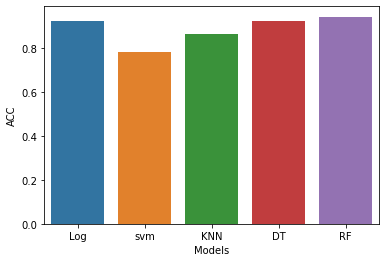

In [75]:
sns.barplot(data=Final_model_data, x='Models', y='ACC')

In [76]:
Final_model_data = pd.DataFrame({'Models' : ['Log', 'svm','KNN', 'DT', 'RF'],
                                'PRE' : [precision_score(y_test, y_pred2),
                                         precision_score(y_test, y_pred3),
                                         precision_score(y_test, y_pred4),
                                         precision_score(y_test, y_pred5),
                                         precision_score(y_test, y_pred6),
                                        ]})

In [77]:
Final_model_data

,Models,PRE
0,Log,0.926503
1,svm,0.831881
2,KNN,0.789098
3,DT,0.917379
4,RF,0.945289


<AxesSubplot:xlabel='Models', ylabel='PRE'>

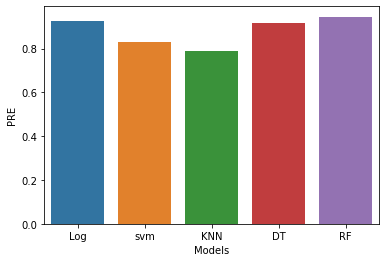

In [78]:
sns.barplot(data=Final_model_data, x='Models', y='PRE')

In [79]:
# SAVE the BEST model : RF

'''
Now we have to train model on entire data set, to evaluate score we split data test and train but for final model we need
entire data

after SMOTE our x and y are X_res and y_res

We did feature scaling on the entire data set
'''

X_res = st.fit_transform(X_res)  #Standard Scaler

In [80]:
RF.fit(X_res, y_res)

RandomForestClassifier()

In [81]:
import joblib #used for saving the model

In [82]:
joblib.dump(RF, 'Churn_predict_model')  #Saved the model

['Churn_predict_model']

In [83]:
model = joblib.load('Churn_predict_model') #to use the model or loan or run

In [84]:
#Performance Prediction

df.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'default_unknown', 'default_yes',
       'housing_unknown', 'housing_yes', 'loan_unknown', 'loan_yes',
       'contact_telephone', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed', 'poutcome_nonexistent', 'poutcome_success', 'y'],
      dtype='object')

In [87]:
model.predict([[43,6,0,0,0,0,0,0,0,0,0,0,0,0,7,9,10,0,0,0,0,1,0,10,11,0,0,16,19,32,65,0,0,0,0,0,5,4]])

array([1], dtype=uint8)

In [ ]:
#After that we can create GUI to do predict